<a href="https://colab.research.google.com/github/ghirailghiro/MuffinVsChihuahua/blob/4-train-and-eval-for-first-architecture/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of the dataset

The dataset is made by 5917 images with a split in train and test of 80% and 20%. This dataset raprents image of chihuahua and muffin. We are going to start to load the dataset from drive anche check how many images we have per class.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/Statistical Method/archive.zip"

'/content/drive/MyDrive/Statistical Method/archive.zip'


In [3]:
!unzip -q "/content/drive/MyDrive/Statistical Method/archive.zip" -d "./dataset"

In [ ]:
import os, os.path

def return_how_many_files(dir):
  return len(os.listdir(dir))

train_muffins = return_how_many_files("/content/dataset/train/muffin")
train_chihuahuas = return_how_many_files("/content/dataset/train/chihuahua")
total_train = train_chihuahuas + train_muffins

print("Train set:")
print(f'Total amount: {total_train}')
print(f'Amount of Muffins: {100*(train_muffins/total_train)}')
print(f'Amount of Chihuahuas: {100*(train_chihuahuas/total_train)}')

test_muffins = return_how_many_files("/content/dataset/test/muffin")
test_chihuahuas = return_how_many_files("/content/dataset/test/chihuahua")
total_test = test_chihuahuas + test_muffins

print("Test set:")
print(f'Total amount: {total_test}')
print(f'Amount of Muffins: {100*(test_muffins/total_test)}')
print(f'Amount of Chihuahuas: {100*(test_chihuahuas/total_test)}')

print(f"Total Images: {total_train+total_test}")

Train set:
Total amount: 4733
Amount of Muffins: 45.93281216987112
Amount of Chihuahuas: 54.06718783012888
Test set:
Total amount: 1184
Amount of Muffins: 45.94594594594595
Amount of Chihuahuas: 54.054054054054056
Total Images: 5917


### As we can see the distribution of the class are more less equal we have a slithly more images in the Chihuahuas class then the muffins class, let's see now some of the images of the Chihuahuas.

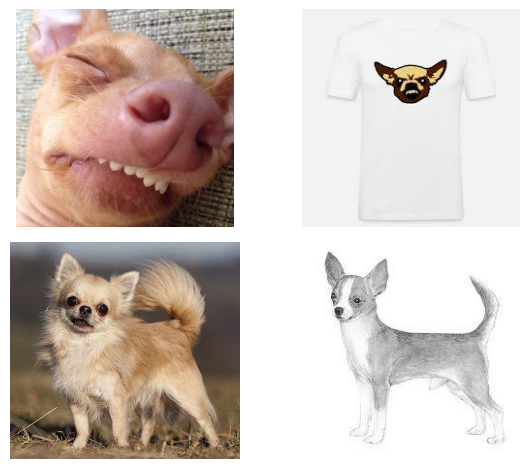

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_4_images(list_of_4_images):
  if len(list_of_4_images) != 4:
    print("Could not print list not of 4")
    return

  # Create a new figure with 2x2 subplots
  fig, axs = plt.subplots(2, 2)
  image1 = mpimg.imread(list_of_4_images[0])
  image2 = mpimg.imread(list_of_4_images[1])
  image3 = mpimg.imread(list_of_4_images[2])
  image4 = mpimg.imread(list_of_4_images[3])


  # Plot each image in its respective subplot
  axs[0, 0].imshow(image1)
  axs[0, 0].axis('off')  # Turn off axis labels
  axs[0, 1].imshow(image2)
  axs[0, 1].axis('off')
  axs[1, 0].imshow(image3)
  axs[1, 0].axis('off')
  axs[1, 1].imshow(image4)
  axs[1, 1].axis('off')

  plt.tight_layout()
  plt.show()


list_of_chihuahuas = ['/content/dataset/train/chihuahua/img_0_1.jpg',
'/content/dataset/train/chihuahua/img_0_642.jpg',
'/content/dataset/train/chihuahua/img_0_641.jpg',
'/content/dataset/train/chihuahua/img_0_644.jpg',]

print_4_images(list_of_chihuahuas)


### Let's now check some images of the muffins

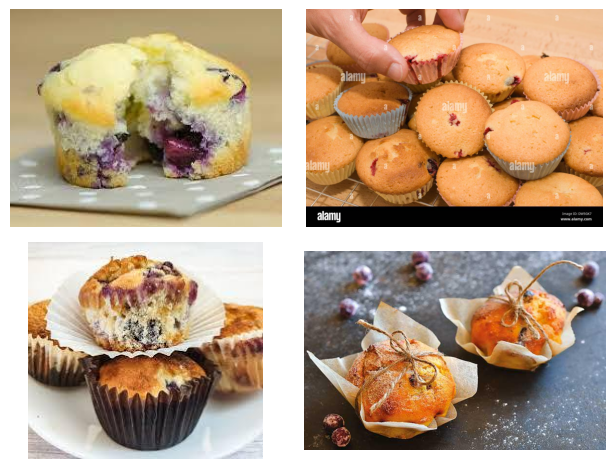

In [ ]:
list_of_muffins = ['/content/dataset/train/muffin/img_0_859.jpg',
'/content/dataset/train/muffin/img_2_471.jpg',
'/content/dataset/train/muffin/img_0_959.jpg',
'/content/dataset/train/muffin/img_2_553.jpg',]

print_4_images(list_of_muffins)


In [4]:
import os
import pandas as pd
from sklearn.model_selection import KFold

# Base directory where the dataset is stored
base_dir = '/content/dataset'

# List all files and their categories
data = []
for split in ['train', 'test']:  # 'test' can be used for a final evaluation if needed
    for category in ['muffin', 'chihuahua']:
        directory = os.path.join(base_dir, split, category)
        for filename in os.listdir(directory):
            # Only include image files
            if filename.endswith('.jpg') or filename.endswith('.png'):
                filepath = os.path.join(directory, filename)
                data.append((filepath, category))

# Create DataFrame
df = pd.DataFrame(data, columns=['filename', 'class'])

# Convert class labels to binary (0 and 1)
class_mapping = {'muffin': 0, 'chihuahua': 1}
#df['class'] = df['class'].map(class_mapping)


In [5]:
df

,filename,class
0,/content/dataset/train/muffin/img_0_354.jpg,muffin
1,/content/dataset/train/muffin/img_2_450.jpg,muffin
2,/content/dataset/train/muffin/img_4_590.jpg,muffin
3,/content/dataset/train/muffin/img_4_268.jpg,muffin
4,/content/dataset/train/muffin/img_1_93.jpg,muffin
...,...,...
5912,/content/dataset/test/chihuahua/img_3_552.jpg,chihuahua
5913,/content/dataset/test/chihuahua/img_3_186.jpg,chihuahua
5914,/content/dataset/test/chihuahua/img_1_548.jpg,chihuahua
5915,/content/dataset/test/chihuahua/img_2_828.jpg,chihuahua


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import KFold
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import time

# Image specifications
img_width, img_height = 256, 256
batch_size = 32
input_shape = (img_width, img_height, 3)

# Data generator configuration
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Experiment parameters
default_fit_params = {
    'batch_size': batch_size,
    'epochs': 3,
    'learning_rate': 0.001
}

modified_lr_params = {
    'batch_size': batch_size,
    'epochs': 3,
    'learning_rate': 0.0001
}

modified_batch_params = {
    'batch_size': (batch_size // 2),
    'epochs': 6,
    'learning_rate': 0.001
}

def create_model_arc1(input_shape, flag_summary = False, plot_model_flag=False, model_image_path='model_arc1.png'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    if(flag_summary):
      model.summary()
    if plot_model_flag:
      plot_model(model, to_file=model_image_path, show_shapes=True, show_layer_names=True)
    return model

def create_model_arc2(input_shape, flag_summary = False, plot_model_flag=False, model_image_path='model_arc2.png'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    if(flag_summary):
      model.summary()
    if plot_model_flag:
      plot_model(model, to_file=model_image_path, show_shapes=True, show_layer_names=True)
    return model

def create_model_arc3(input_shape, flag_summary = False, plot_model_flag=False, model_image_path='model_arc3.png'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    if plot_model_flag:
      plot_model(model, to_file=model_image_path, show_shapes=True, show_layer_names=True)
    if(flag_summary):
      model.summary()
    return model

In [16]:
# Function to run experiments
def run_experiment(create_model_func, input_shape, experiment_num, fit_params):
    fold_results = []

    batch_size = fit_params["batch_size"]
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(df):
        start_time = time.time()
        train_df = df.iloc[train_index]
        val_df = df.iloc[val_index]

        train_generator = datagen.flow_from_dataframe(
            dataframe=train_df,
            x_col='filename',
            y_col='class',
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='binary'
        )

        validation_generator = datagen.flow_from_dataframe(
            dataframe=val_df,
            x_col='filename',
            y_col='class',
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='binary'
        )

        model = create_model_func(input_shape)
        model.compile(optimizer=Adam(learning_rate=fit_params['learning_rate']),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        steps_per_epoch = len(train_df) // batch_size
        validation_steps = len(val_df) // batch_size

        history = model.fit(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=fit_params['epochs'],
            validation_data=validation_generator,
            validation_steps=validation_steps
        )

        validation_generator.reset()
        val_predictions = []
        actual_labels = []
        for i in range(validation_steps):
            x_batch, y_batch = next(validation_generator)
            preds = model.predict_on_batch(x_batch)
            val_predictions.extend(preds)
            actual_labels.extend(y_batch)

        val_predictions = np.array(val_predictions)
        actual_labels = np.array(actual_labels)

        val_predictions = (val_predictions > 0.5).astype(int)
        zero_one_loss = np.mean(val_predictions.flatten() != actual_labels[:len(val_predictions)].flatten())
        end_time = time.time()
        execution_time = end_time - start_time
        fold_results.append(
            {
                "History":history,
                "History_zero_one_loss":val_predictions.flatten() != actual_labels[:len(val_predictions)].flatten(),
                "mean_zero_one_loss": zero_one_loss,
                "execution_time":execution_time
            })

    return {
        'model': create_model_func.__name__,
        'experiment': experiment_num,
        'fold_results': fold_results,
        'fit_params':fit_params,
    }

In [28]:
#First Architecture:
create_model_arc1(input_shape,True,True)
create_model_arc2(input_shape,True,True)
create_model_arc3(input_shape,True,True)

results = []

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 516128)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                33032256  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33033217 (126.01 MB)
Trainable params: 33033217 (126.01 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [17]:
results.append(run_experiment(create_model_arc1, input_shape, 1, default_fit_params))

Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/3
147/147 [==============================] - 111s 747ms/step - loss: 1.2831 - accuracy: 0.7564 - val_loss: 0.4438 - val_accuracy: 0.8083
Epoch 2/3
147/147 [==============================] - 117s 794ms/step - loss: 0.4072 - accuracy: 0.8211 - val_loss: 0.3749 - val_accuracy: 0.8480
Epoch 3/3
147/147 [==============================] - 114s 779ms/step - loss: 0.3770 - accuracy: 0.8407 - val_loss: 0.3741 - val_accuracy: 0.8505
Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/3
147/147 [==============================] - 115s 776ms/step - loss: 1.8984 - accuracy: 0.7120 - val_loss: 0.4764 - val_accuracy: 0.7770
Epoch 2/3
147/147 [==============================] - 114s 780ms/step - loss: 0.4333 - accuracy: 0.8030 - val_loss: 0.4025 - val_accuracy: 0.8260
Epoch 3/3
147/147 [============

In [22]:
results.append(run_experiment(create_model_arc1, input_shape, 2, modified_lr_params))

Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/3
147/147 [==============================] - 112s 746ms/step - loss: 0.6531 - accuracy: 0.7188 - val_loss: 0.4385 - val_accuracy: 0.8083
Epoch 2/3
147/147 [==============================] - 110s 750ms/step - loss: 0.4428 - accuracy: 0.7975 - val_loss: 0.4256 - val_accuracy: 0.8091
Epoch 3/3
147/147 [==============================] - 107s 733ms/step - loss: 0.4230 - accuracy: 0.8154 - val_loss: 0.3806 - val_accuracy: 0.8404
Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/3
147/147 [==============================] - 110s 744ms/step - loss: 0.7884 - accuracy: 0.6856 - val_loss: 0.5736 - val_accuracy: 0.7264
Epoch 2/3
147/147 [==============================] - 110s 748ms/step - loss: 0.4758 - accuracy: 0.7817 - val_loss: 0.4230 - val_accuracy: 0.8091
Epoch 3/3
147/147 [============

In [41]:
results.append(run_experiment(create_model_arc1, input_shape, 3, modified_batch_params))

Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/6
295/295 [==============================] - 133s 442ms/step - loss: 0.8881 - accuracy: 0.7464 - val_loss: 0.4543 - val_accuracy: 0.8117
Epoch 2/6
295/295 [==============================] - 111s 378ms/step - loss: 0.4635 - accuracy: 0.7992 - val_loss: 0.5073 - val_accuracy: 0.7635
Epoch 3/6
295/295 [==============================] - 111s 376ms/step - loss: 0.4958 - accuracy: 0.7829 - val_loss: 0.4788 - val_accuracy: 0.8091
Epoch 4/6
295/295 [==============================] - 110s 374ms/step - loss: 0.4516 - accuracy: 0.8270 - val_loss: 0.4441 - val_accuracy: 0.8235
Epoch 5/6
295/295 [==============================] - 111s 377ms/step - loss: 0.4151 - accuracy: 0.8349 - val_loss: 0.4332 - val_accuracy: 0.8159
Epoch 6/6
295/295 [==============================] - 111s 376ms/step - loss: 0.4039 - accuracy: 0.8382 - val_loss: 0.3948 - val_accuracy: 0.8336
Found 47

In [ ]:
results.append(run_experiment(create_model_arc2, input_shape, 1, default_fit_params))

In [ ]:
results.append(run_experiment(create_model_arc2, input_shape, 2, modified_lr_params))

In [ ]:
results.append(run_experiment(create_model_arc2, input_shape, 3, modified_batch_params))

In [44]:
# Print the results

results_copy = results.copy()
for i in range(len(results_copy)):
    for j in range(len(results_copy[i]["fold_results"])):
        try:
          results_copy[i]["fold_results"][j]["History"] = results_copy[i]["fold_results"][j]["History"].history
          results_copy[i]["fold_results"][j]["History_zero_one_loss"] = results_copy[i]["fold_results"][j]["History_zero_one_loss"].tolist()
          print(f"History : {results_copy[i]['fold_results'][j]['History']}")
        except:
          print("Error")




Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
History : {'loss': [0.8880950808525085, 0.46347808837890625, 0.49577873945236206, 0.4516284763813019, 0.41511666774749756, 0.4039246737957001], 'accuracy': [0.7464489936828613, 0.7992367744445801, 0.7829128503799438, 0.8270086646080017, 0.8348526358604431, 0.8382446765899658], 'val_loss': [0.45428013801574707, 0.5072814226150513, 0.478766530752182, 0.44410422444343567, 0.43323424458503723, 0.39477887749671936], 'val_accuracy': [0.8116554021835327, 0.7635135054588318, 0.8091216087341309, 0.8234797120094299, 0.8158783912658691, 0.8336148858070374]}
History : {'loss': [1.2914588451385498, 0.427926629781723, 0.3798235356807709, 0.38420453667640686, 0.37018120288848877, 0.3420073091983795], 'accuracy': [0.7564129829406738, 0.8102607727050781, 0.8293406963348389, 0.8325206637382507, 0.8426966071128845, 0.852660596370697], 'val_loss': [0.49198201298713684, 0.4414633810520172, 0.3616281747817993, 0.3946930468082428, 0.3864531219005584

In [ ]:
results_copy

In [45]:
import json
with open('outputfile_arc2.json', 'w') as fout:
    json.dump(results_copy, fout)

In [4]:
!ls "/content/drive/MyDrive/Statistical Method"

archive.zip  outputfile.json


In [29]:
import json
with open('/content/drive/MyDrive/Statistical Method/outputfile_arc2.json') as f:
    d = json.load(f)
    print(d)

[{'model': 'create_model_arc1', 'experiment': 1, 'fold_results': [{'History': {'loss': [1.2831084728240967, 0.40721192955970764, 0.3770171105861664], 'accuracy': [0.7564347982406616, 0.8211019039154053, 0.8406721949577332], 'val_loss': [0.44383764266967773, 0.3749125599861145, 0.3740764558315277], 'val_accuracy': [0.8082770109176636, 0.8479729890823364, 0.8505067825317383]}, 'History_zero_one_loss': [True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, 

In [30]:
for i in d:
  print(f"Model : {i['model']}, Experiment Number {i['experiment']}")
  execution_time = []
  mean_overall_zero_one = []
  for j in i['fold_results']:
    execution_time.append(j['execution_time'])
    mean_overall_zero_one.append(j["mean_zero_one_loss"])
  print("List of Validation zero one loss for all the folders:", mean_overall_zero_one)
  print(f"Execution time: {sum(execution_time) / 60} Minutes")
  zero_one = sum(mean_overall_zero_one) / len(mean_overall_zero_one)
  print(f"Validation zero one loss mean of folders: {zero_one}")
  print(f"Accuracy canculated with zero one loss of folders: {(1 - zero_one) * 100}%")
  print("-------------------------------------------------------------------------------")


Model : create_model_arc1, Experiment Number 1
List of Validation zero one loss for all the folders: [0.1570945945945946, 0.15625, 0.15885416666666666, 0.4661458333333333, 0.16319444444444445]
Execution time: 31.85639851888021 Minutes
Validation zero one loss mean of folders: 0.2203078078078078
Accuracy canculated with zero one loss of folders: 77.96921921921923%
-------------------------------------------------------------------------------
Model : create_model_arc1, Experiment Number 2
List of Validation zero one loss for all the folders: [0.16976351351351351, 0.20354729729729729, 0.15364583333333334, 0.18489583333333334, 0.1753472222222222]
Execution time: 33.55703756809235 Minutes
Validation zero one loss mean of folders: 0.17743993993993995
Accuracy canculated with zero one loss of folders: 82.256006006006%
-------------------------------------------------------------------------------
Model : create_model_arc1, Experiment Number 3
List of Validation zero one loss for all the fold

Let's now create a CNN to try to classify this dataset

# Testing

# Fine tuning